Ritwatz Raj
RA2111047010130

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

class CustomEnv:
    def __init__(self):
        # Define the number of states and actions
        self.n_states = 5
        self.n_actions = 2

        # Define transition probabilities
        self.P = np.zeros((self.n_states, self.n_actions, self.n_states))
        self.P[0, 0, :] = [0.9, 0.1, 0.0, 0.0, 0.0]
        self.P[0, 1, :] = [0.0, 0.0, 0.9, 0.1, 0.0]
        self.P[1, 0, :] = [0.8, 0.2, 0.0, 0.0, 0.0]
        self.P[1, 1, :] = [0.0, 0.0, 0.8, 0.2, 0.0]
        self.P[2, 0, :] = [0.0, 0.0, 0.0, 0.0, 1.0]
        self.P[2, 1, :] = [0.0, 0.0, 0.0, 0.0, 1.0]
        self.P[3, 0, :] = [1.0, 0.0, 0.0, 0.0, 0.0]
        self.P[3, 1, :] = [0.0, 1.0, 0.0, 0.0, 0.0]
        self.P[4, :, :] = [0.0, 0.0, 0.0, 0.0, 1.0]

        # Define rewards
        self.R = np.zeros((self.n_states, self.n_actions))
        self.R[0, 0] = 1.0
        self.R[0, 1] = 1.0
        self.R[1, 0] = 1.0
        self.R[1, 1] = 1.0
        self.R[2, 0] = 1.0
        self.R[2, 1] = 1.0
        self.R[3, 0] = 1.0
        self.R[3, 1] = 1.0

        # Start from state 0
        self.current_state = 0

    def reset(self):
        self.current_state = 0
        return self.current_state

    def step(self, action):
        next_state = np.random.choice(self.n_states, p=self.P[self.current_state, action])
        reward = self.R[self.current_state, action]
        self.current_state = next_state
        done = self.current_state == 4
        return next_state, reward, done, {}

    def render(self):
        pass

def random_policy(state):
    return np.random.randint(0, 2)

def monte_carlo_prediction(env, policy, num_episodes, gamma=1.0):
    returns_sum = {}
    returns_count = {}
    V = {}

    for _ in range(num_episodes):
        episode = []
        state = env.reset()
        done = False
        while not done:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state

        visited_states = set()
        for t, (state, _, _) in enumerate(episode):
            if state not in visited_states:
                visited_states.add(state)
                G = sum([x[2] * gamma**i for i, x in enumerate(episode[t:])])
                if state in returns_sum:
                    returns_sum[state] += G
                    returns_count[state] += 1
                else:
                    returns_sum[state] = G
                    returns_count[state] = 1
                V[state] = returns_sum[state] / returns_count[state]

    return V
if __name__ == "__main__":
    env = CustomEnv()
    num_episodes = 10000
    V = monte_carlo_prediction(env, random_policy, num_episodes)
    for state, value in V.items():
        print(f"State: {state}, Value: {value}")
    states = list(V.keys())
    values = list(V.values())


State: 0, Value: 3.3453
State: 3, Value: 4.501937984496124
State: 1, Value: 3.6135714285714284
State: 2, Value: 1.0


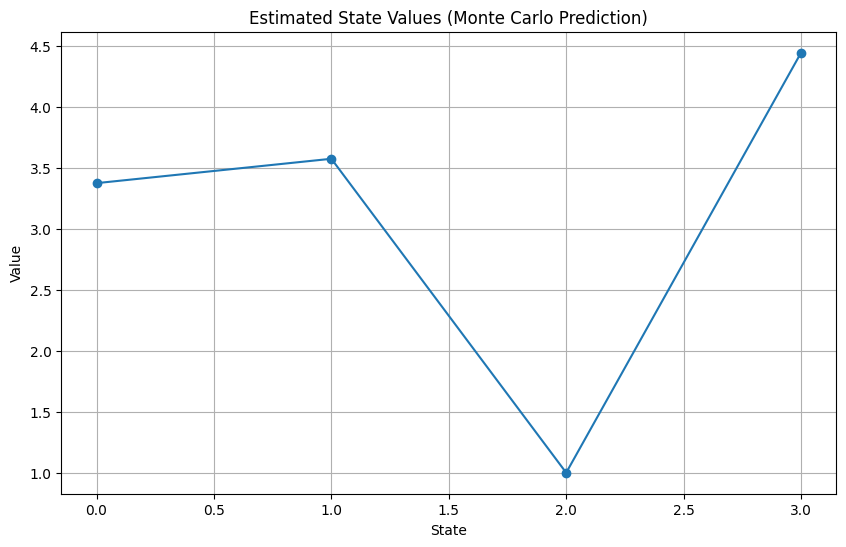

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(states, values, marker='o', linestyle='-')
plt.title('Estimated State Values (Monte Carlo Prediction)')
plt.xlabel('State')
plt.ylabel('Value')
plt.grid(True)
plt.show()